In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#additional queries
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp_data = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date == 6)).all()
june_temp_data

[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 61.0),
 ('2010-01-14', 66.0),
 ('2010-01-15', 65.0),
 ('2010-01-16', 68.0),
 ('2010-01-17', 64.0),
 ('2010-01-18', 72.0),
 ('2010-01-19', 66.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 67.0),
 ('2010-01-23', 67.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 67.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 68.0),
 ('2010-01-28', 72.0),
 ('2010-01-30', 70.0),
 ('2010-01-31', 67.0),
 ('2010-02-01', 66.0),
 ('2010-02-03', 67.0),
 ('2010-02-04', 69.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 67.0),
 ('2010-02-07', 64.0),
 ('2010-02-08', 69.0),
 ('2010-02-09', 73.0),
 ('2010-02-11', 73.0),
 ('2010-02-12', 69.0),
 ('2010-02-13', 69.0),
 ('2010-02-14', 69.0),
 ('2010-02-15', 71.0),
 ('2010-02-16', 61.0),
 ('2010-02-17', 69.0),
 ('2010-02-

In [5]:
# 2. Convert the June temperatures to a list.
june_temp_data = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
print(june_temp_data)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_temp_data_df = pd.DataFrame(june_temp_data)
print(june_temp_data_df)

      tobs
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_data_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp_data = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()
print(dec_temp_data)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp_data = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()
print(dec_temp_data)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_data_df = pd.DataFrame(dec_temp_data)
print(dec_temp_data_df)

      tobs
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_data_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

(0.0, 400.0)

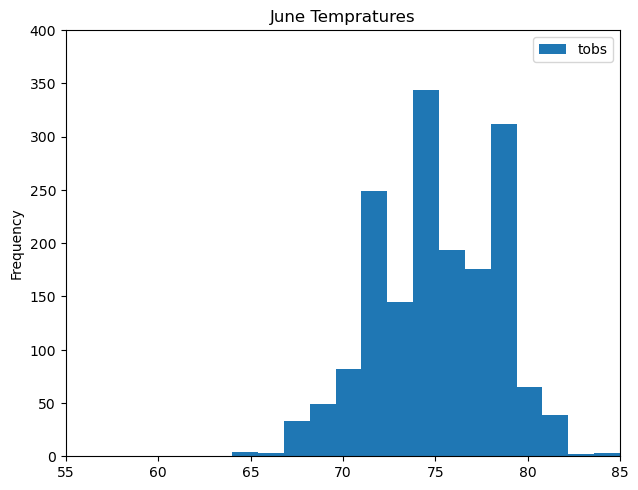

In [14]:
# Additional Query 1: June Precipitation
june_temp_data_df = pd.DataFrame(june_temp_data, columns=['tobs'])
june_temp_data_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Tempratures')
plt.xlim([55,85])
plt.ylim([0,400])


(0.0, 400.0)

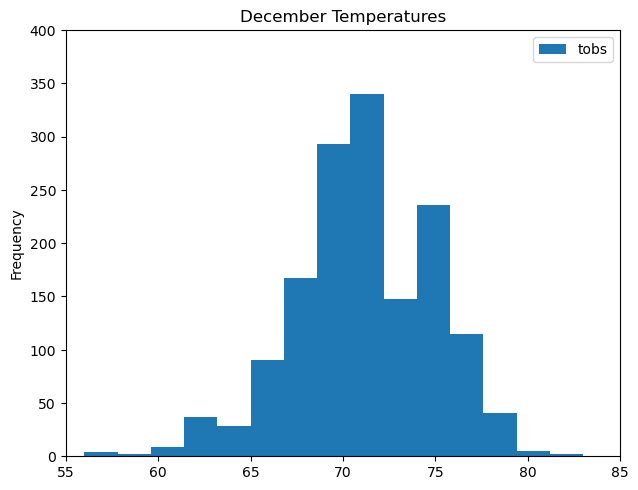

In [15]:
#Additional Query 2 : December Preciptation
dec_temp_data_df = pd.DataFrame(dec_temp_data, columns=['tobs'])
dec_temp_data_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,400])

In [19]:
june_temp_data_prcp = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
june_temp_data_prcp_df= pd.DataFrame(june_temp_data_prcp)
june_temp_data_prcp_df.describe()

,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


(0.0, 8.0)

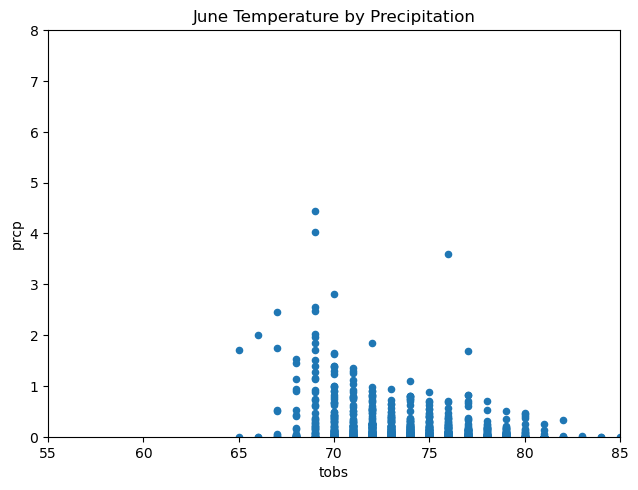

In [24]:
# June graph of temp x prcp with trendline
june_temp_data_prcp_df = pd.DataFrame(june_temp_data_prcp, columns=['tobs','prcp'])
# have to drop Nans to plot on the scatterplot
june_temp_data_prcp_df = june_temp_data_prcp_df.dropna()
june_temp_data_prcp_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('June Temperature by Precipitation')
plt.xlim([55, 85])
plt.ylim([0,8])

In [27]:
dec_temp_data_prcp = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_temp_data_prcp_df = pd.DataFrame(dec_temp_data_prcp)
# print(dec_temp_prcp_df)
dec_temp_prcp_df.describe()

,tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


(0.0, 8.0)

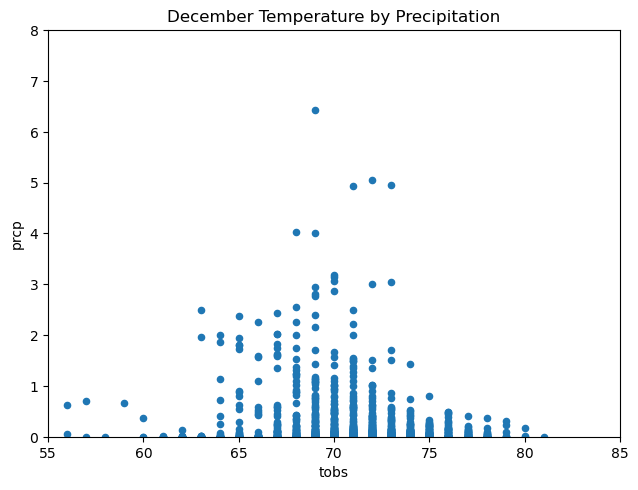

In [28]:
# Dec graph of temp x prcp with trendline
dec_temp_data_prcp_df = pd.DataFrame(dec_temp_data_prcp, columns=['tobs','prcp'])
# have to drop Nans to plot on the scatterplot
dec_temp_data_prcp_df = dec_temp_data_prcp_df.dropna()
dec_temp_data_prcp_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('December Temperature by Precipitation')
plt.xlim([55, 85])
plt.ylim([0,8])